<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">

This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>.

---

In this notebook, we illustrate NumPy features for working with correlated data. Check the [associated lecture slides](https://risk-engineering.org/correlation/) for background material and to download this content as a Jupyter/Python notebook. 

# Linear correlation

In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]

In [2]:
X = numpy.random.normal(10, 1, 100)
X

array([11.39023703,  9.76920606,  9.07479418,  9.39625114,  8.99889377,
       10.54364842, 11.03081545, 10.54337996, 11.19396177,  9.67272233,
        8.80909476, 10.84484699,  8.57130105, 10.40535603,  9.72497908,
        9.58266929, 10.3328308 , 10.2464191 , 10.79499154, 11.04594916,
        9.51819791,  9.41608645, 10.27915772,  9.73768251, 10.65412355,
        9.50063255,  9.70436986,  9.29896932,  9.55237741, 10.84766579,
        7.91409973, 10.67326437, 11.88916741,  9.51602023,  8.31559092,
        8.47744462,  9.31635733, 10.43198955,  9.61494867,  9.84277882,
       10.14055716, 10.1651312 , 11.50194307,  9.24091041, 10.24431736,
       10.7519717 ,  8.66865188,  9.70824642,  9.91811942, 10.24372973,
        9.24604362,  9.85308419,  8.72364119, 10.42102911, 10.04295953,
        9.45016706, 10.30770038,  9.27122751,  9.80195047,  9.72311521,
        9.93962737,  8.83903419, 10.62216636,  9.81441726,  8.04806101,
        9.8112147 , 10.68188249, 11.34992325, 10.56852119,  8.26

In [3]:
Y = -X + numpy.random.normal(0, 1, 100)

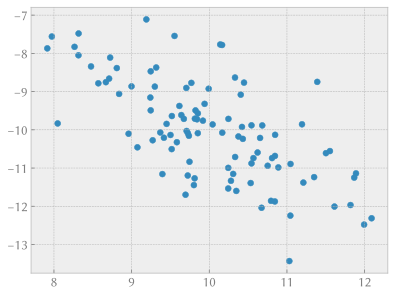

In [4]:
plt.scatter(X, Y);

Looking at the scatterplot above, we can see that the random variables $X$ and $Y$ are *correlated*. There are various statistical measures that allow us to quantify the degree of linear correlation. The most commonly used is [Pearson’s product-moment correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). It is available in `scipy.stats`. 

In [5]:
scipy.stats.pearsonr(X, Y)

PearsonRResult(statistic=-0.6676268680968469, pvalue=3.2957529815007626e-14)

The first return value is the linear correlation coefficient, a value between -1 and 1 which measures the strength of the linear correlation. A value greater than 0.9 indicates a strong positive linear correlation, and a value lower than -0.9 indicates strong negative linear correlation (when $X$ increases, $Y$ decreases).

(The second return value is a *p-value*, which is a measure of the confidence which can be placed in the estimation of the correlation coefficient (smaller = more confidence). It tells you the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. Here we have a very very low p-value, so high confidence in the estimated value of the correlation coefficient.)

## Exercises

**Exercise**: show that when the error in $Y$ decreases, the correlation coefficient increases.

**Exercise**: produce data and a plot with a negative correlation coefficient.

## Anscombe’s quartet

Let’s examine four datasets produced by the statistician [Francis Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe) to illustrate the importance of exploring your data qualitatively (for example by plotting the data), rather than relying only on summary statistics such as the linear correlation coefficient.

In [6]:
x =  numpy.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = numpy.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = numpy.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = numpy.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = numpy.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = numpy.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

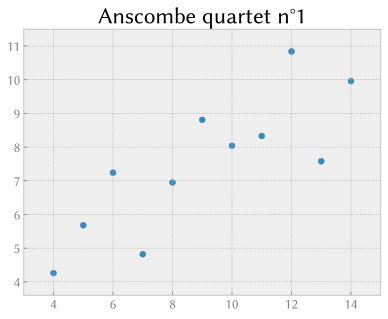

In [7]:
plt.scatter(x, y1)
plt.title("Anscombe quartet n°1")
plt.margins(0.1)

In [8]:
scipy.stats.pearsonr(x, y1)

PearsonRResult(statistic=0.81642051634484, pvalue=0.002169628873078783)

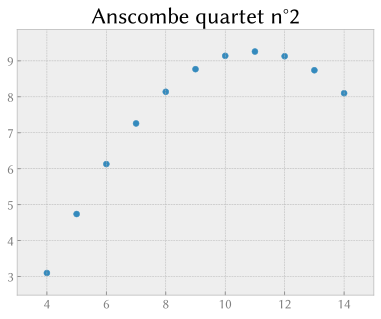

In [9]:
plt.scatter(x, y2)
plt.title("Anscombe quartet n°2")
plt.margins(0.1)

In [10]:
scipy.stats.pearsonr(x, y2)

PearsonRResult(statistic=0.8162365060002427, pvalue=0.0021788162369108114)

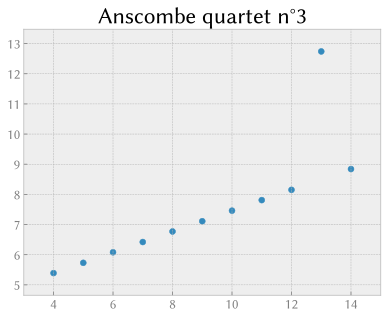

In [11]:
plt.scatter(x, y3)
plt.title("Anscombe quartet n°3")
plt.margins(0.1)

In [12]:
scipy.stats.pearsonr(x, y3)

PearsonRResult(statistic=0.8162867394895982, pvalue=0.0021763052792280213)

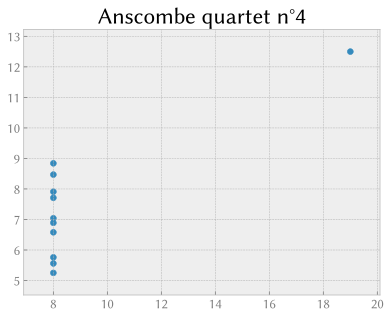

In [13]:
plt.scatter(x4, y4)
plt.title("Anscombe quartet n°4")
plt.margins(0.1)

In [14]:
scipy.stats.pearsonr(x4, y4)

PearsonRResult(statistic=0.8165214368885029, pvalue=0.002164602347197214)

Notice that the linear correlation coefficient (Pearson's $r$) of the four datasets is identical, though clearly the relationship between $X$ and $Y$ is very different in each case! This illustrates the risks of depending only on quantitative descriptors to understand your datasets: you should also use different types of plots to give you a better overview of the data.

## The Datasaurus

The [Datasaurus](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html) provides another illustration of the importance of plotting your data to make sure it doesn't contain any surprises, rather than relying only on summary statistics. 

In [15]:
import pandas

ds = pandas.read_csv("https://risk-engineering.org/static/data/datasaurus.csv", header=None)
ds.describe()

0           1
count  142.000000  142.000000
mean    54.263273   47.832253
std     16.765142   26.935403
min     22.307700    2.948700
25%     44.102600   25.288450
50%     53.333300   46.025600
75%     64.743600   68.525675
max     98.205100   99.487200

In [16]:
scipy.stats.pearsonr(ds[0], ds[1])

PearsonRResult(statistic=-0.06447185270095164, pvalue=0.44589659802470283)

These summary statistics don't look too nasty, but check out the data once it's plotted!

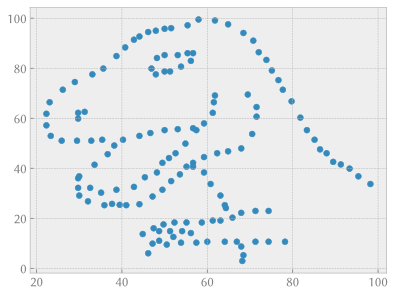

In [17]:
plt.scatter(ds[0], ds[1]);

[This article](https://www.autodeskresearch.com/publications/samestats) titled *Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing* runs a lot further with this concept.